# Xiaoxiao ideas - [Issue #4](https://github.com/lucasbaldezzari/babesbayes-nma/issues/4)

**Performance accuracy in relation to reaction time.**
a. Measurement of Angles: Measure the angles between the selected arrow by subjects and the prior motion showed on screen (using the estimated x/y coordinates). We can set up a distribution of the deviation angles from the real orientation to represent the performance index or accuracy. Categorize the deviation angles into specific ranges, such as "0-5 degrees" and "5-10 degrees."

We can consider the following interpretations:

1. **Reaction Time as an Indicator of Attention**: 
2.  **Learning improvement over study session**
3. **Learning Strategy Adjustment**

#### Colaborators
- Xiaoxiao
- Lucas
- *Any other*

---

In [11]:
##importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, requests
from numpy import pi
import seaborn as sns

from utils import getSubjecBasicStats

In [12]:
data = pd.read_csv("dataset\\data01_direction4priors.csv") ##open file

## Deleting some subjects

**DO NOT** use subject 2, it seems it has NaN values for almost all important rows. In the [Knowing_the_Data.ipynb](https://github.com/lucasbaldezzari/babesbayes-nma/blob/main/coding/Knowing_the_Data.ipynb) colab you can see in the *missing_values* variable that there are several NaN values for the columns 'response_arrow_start_angle', 'reaction_time' and 'raw_response_time'. In my opinion, we should not use the subjects 1, 2, 3 and 4.

So, I will drop all the rows for those subjects.

In [13]:
##delete the rows for subject_id 1, 2, 3 and 4
data = data[~data['subject_id'].isin([1,2,3,4])]
data["subject_id"].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## Processing the data and adding some columns

### 1 Adding *reaction_time_range*

In [14]:
data_processed = data.copy()

In [15]:
ranges = np.arange(0,data_processed.loc[:,"reaction_time"].max(),0.1).round(2)
# print(ranges)
data_processed.loc[:,"reaction_time_range"] = pd.cut(data_processed.loc[:,"reaction_time"], bins=ranges, labels=False)+1

if data_processed.loc[:,'reaction_time_range'].isnull().sum() > 0: ##deleting rows with NaN values
    data_processed = data_processed.dropna(subset=['reaction_time_range'])

indexes = data_processed.loc[:,'reaction_time_range'].value_counts().sort_index().index.astype(int) #get the sorted index
x_labels = np.round(ranges[indexes],1) #filtering the range values using the sorted indexes

## add a reaction_time_range_label column to the data_processed dataframe using the x_labels.
## Loop through the reaction_time_range column and get the corresponding x_labels value
data_processed.loc[:,"reaction_time_range_label"] = data_processed.loc[:,"reaction_time_range"].apply(lambda x: ranges[int(x)] if x < len(ranges) else 0)

In [16]:
print("The ranges in seconds are")
print(ranges)

The ranges in seconds are
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7]


### 2. Getting estimated angles

In [17]:
from utils import getAngles
x = data_processed['estimate_x'].values
y = data_processed['estimate_y'].values
##using estimate_x and estimate_y to calculate the angle
data_processed.loc[:,'estimate_angles'] = np.round(getAngles(x, y), 3)
##limit the angles between 0 and 359 using %360
data_processed.loc[:,'estimate_angles'] = data_processed['estimate_angles'] % 360
data_processed.loc[:,'diff_angles'] = data_processed['motion_direction'] - data_processed['estimate_angles']
# data_processed.loc[:,'diff_angles'].describe()

In [18]:
data_processed.head()

,trial_index,trial_time,response_arrow_start_angle,motion_direction,motion_coherence,estimate_x,estimate_y,reaction_time,raw_response_time,prior_std,prior_mean,subject_id,experiment_name,experiment_id,session_id,run_id,reaction_time_range,reaction_time_range_label,estimate_angles,diff_angles
33204,1,0.000000,52.0,305,0.12,2.326610,-0.914815,3.654474,4.963160,80,225,5,data01_direction4priors,12,4,13,37.0,3.7,338.535,-33.535
33205,2,5.193678,83.0,355,0.24,2.224858,-1.140179,1.833362,8.323177,80,225,5,data01_direction4priors,12,4,13,19.0,1.9,332.866,22.134
33206,3,8.547994,143.0,75,0.06,-2.294819,0.991869,1.391119,11.235064,80,225,5,data01_direction4priors,12,4,13,14.0,1.4,156.625,-81.625
33207,4,11.462982,66.0,185,0.06,-0.924798,2.322660,1.436013,14.195069,80,225,5,data01_direction4priors,12,4,13,15.0,1.5,111.711,73.289
33208,5,14.417872,111.0,325,0.12,1.621822,-1.902549,1.177163,16.891120,80,225,5,data01_direction4priors,12,4,13,12.0,1.2,310.446,14.554


In [19]:
##saving the new data
data_processed.to_csv("dataset\data_processed.csv")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\corre\AppData\Local\Temp\ipykernel_5484\568595744.py:2: SyntaxWarning: invalid escape sequence '\d'
  data_processed.to_csv("dataset\data_processed.csv")


### Columns added

- reaction_time_range: Discrete numbers for reaction time ranges.
- reaction_time_range_label: Label (in seconds) for the reaction time range.
- estimate_angles: Estimated angles using estimate_x and estimate_y. Using $angle = (arctan(frac{y}{x})\times\frac{180}{\pi}) \% 360$
- diff_angles: Difference between *motion_direction* and *estimate_angles*

### Difference between motion and estimated angles divided by prior_std

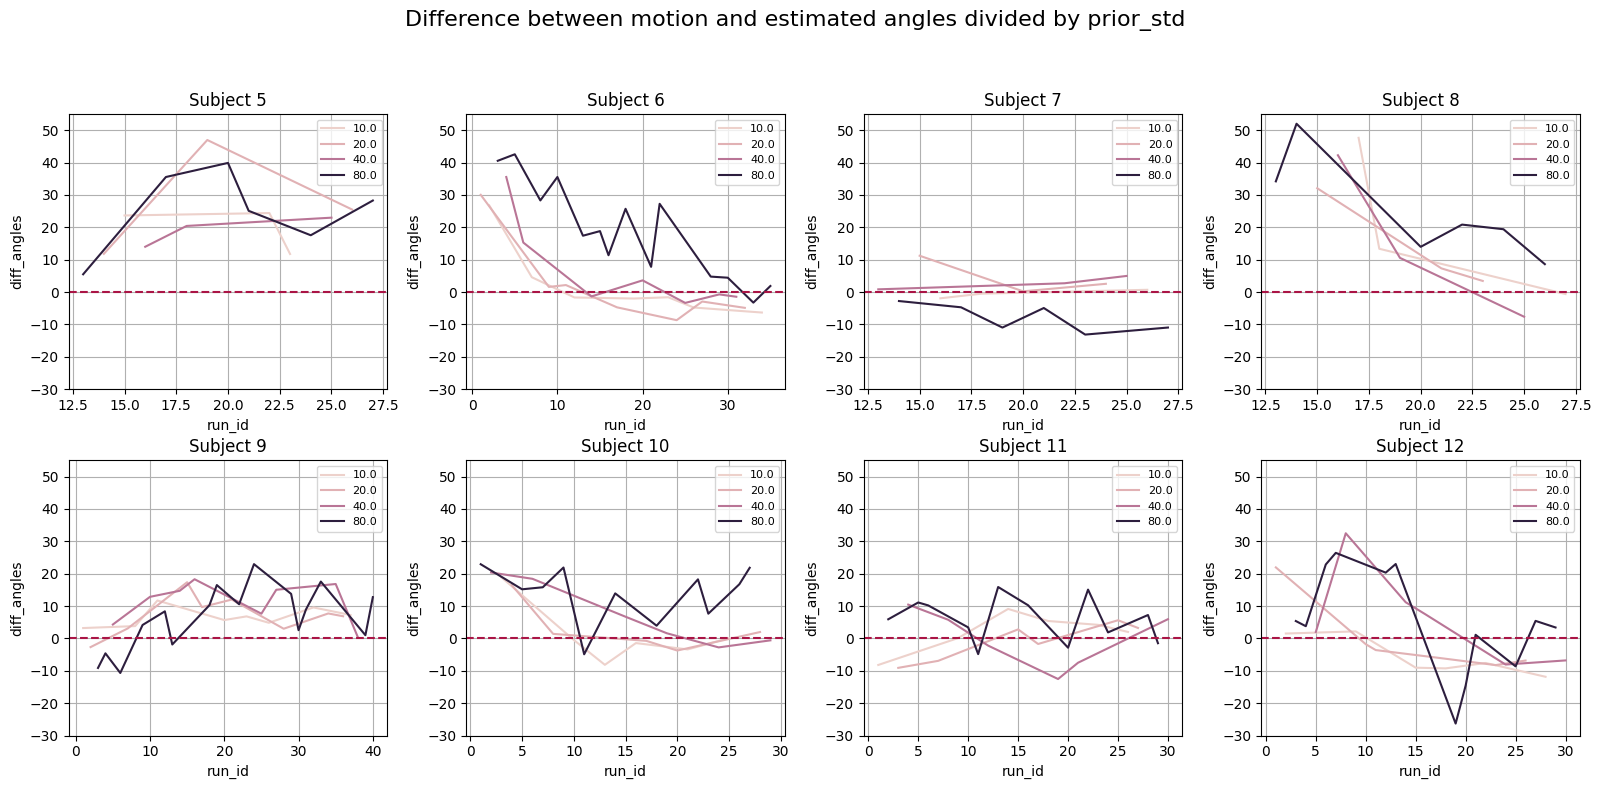

In [20]:
interest_cols = ["motion_direction","estimate_angles","diff_angles","prior_std"]
rows = 2
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(16, 8))
subjects = data_processed["subject_id"].unique()
accum = 0
for i in range(rows):
    for j in range(cols):
        ##grouping the data by run_id for each subject
        temp_data = data_processed[data_processed["subject_id"] == subjects[accum]]
        grups = temp_data.groupby("run_id")[interest_cols].mean()
        sns.lineplot(grups, x = grups.index ,y="diff_angles", hue = "prior_std",ax=axs[i,j])
        axs[i,j].set_title(f"Subject {subjects[accum]}") 
        accum += 1
        ##adding a horizontal line at 0
        axs[i,j].axhline(0, color="#aa1445", linestyle="--")
        ##fontsize of legend in 8
        axs[i,j].legend(fontsize=8)
        ##limit the y-axis to -15 and 55
        axs[i,j].set_ylim(-30,55)
        ##grid on
        axs[i,j].grid()
plt.tight_layout()
##general title
plt.suptitle("Difference between motion and estimated angles divided by prior_std", fontsize=16)
##adding space between the subplots
plt.subplots_adjust(top=0.85)
plt.show()